# League of Legends Match Data Analysis
## Data Cleaning, Feature Engineering, and Exploratory Visualization

This notebook processes 48,360 League of Legends matches with 100,000+ player statistics from EUW region.

**Dataset Overview:**
- 48,360 matches (ARAM + CLASSIC)
- 2,381 unique summoners
- Patches 13.22 through 15.1
- Ranks: Unranked to Challenger


## 1. Setup and Imports


In [18]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilities
import re
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


## 2. Data Loading


In [ ]:
# Load all CSV files from raw_data folder
print("Loading datasets from raw_data folder...\n")

# Reference tables
champions_df = pd.read_csv('raw_data/ChampionTbl.csv')
items_df = pd.read_csv('raw_data/ItemTbl.csv')
ranks_df = pd.read_csv('raw_data/RankTbl.csv')

# Match data
matches_df = pd.read_csv('raw_data/MatchTbl.csv')
team_matches_df = pd.read_csv('raw_data/TeamMatchTbl.csv')
summoner_matches_df = pd.read_csv('raw_data/SummonerMatchTbl.csv')
match_stats_df = pd.read_csv('raw_data/MatchStatsTbl.csv')

# Display info
datasets = {
    'Champions': champions_df,
    'Items': items_df,
    'Ranks': ranks_df,
    'Matches': matches_df,
    'Team Matches': team_matches_df,
    'Summoner Matches': summoner_matches_df,
    'Match Stats': match_stats_df
}

for name, df in datasets.items():
    print(f"{name:20s}: {len(df):,} rows x {len(df.columns)} columns")

print("\n✅ All datasets loaded successfully!")


Loading datasets...

Champions           : 172 rows x 2 columns
Items               : 635 rows x 2 columns
Ranks               : 11 rows x 2 columns
Matches             : 48,359 rows x 5 columns
Team Matches        : 47,895 rows x 24 columns
Summoner Matches    : 106,966 rows x 4 columns
Match Stats         : 106,966 rows x 31 columns

✅ All datasets loaded successfully!


## 3. Initial Data Exploration


In [20]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES CHECK")
print("=" * 80)

for name, df in datasets.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n{name}:")
        print(missing[missing > 0])
    else:
        print(f"\n{name}: ✅ No missing values")


MISSING VALUES CHECK

Champions: ✅ No missing values

Items: ✅ No missing values

Ranks: ✅ No missing values

Matches: ✅ No missing values

Team Matches: ✅ No missing values

Summoner Matches: ✅ No missing values

Match Stats: ✅ No missing values


In [21]:
# Display sample data
print("\n" + "=" * 80)
print("SAMPLE DATA")
print("=" * 80)

print("\n📊 Match Stats (first 5 rows):")
display(match_stats_df.head())

print("\n🏆 Matches (first 5 rows):")
display(matches_df.head())

print("\n⚔️ Team Matches (first 5 rows):")
display(team_matches_df.head())



SAMPLE DATA

📊 Match Stats (first 5 rows):


,MatchStatsId,SummonerMatchFk,MinionsKilled,DmgDealt,DmgTaken,TurretDmgDealt,TotalGold,Lane,Win,item1,item2,item3,item4,item5,item6,kills,deaths,assists,PrimaryKeyStone,PrimarySlot1,PrimarySlot2,PrimarySlot3,SecondarySlot1,SecondarySlot2,SummonerSpell1,SummonerSpell2,CurrentMasteryPoints,EnemyChampionFk,DragonKills,BaronKills,visionScore
0,1,1,30,4765,12541,0,7058,BOTTOM,0,3870,2055,3107,3171,6620,2022,0,2,12,8465,8463,8473,8453,8345,8347,4,7,902,51,0,0,67
1,2,2,29,8821,14534,1,9618,BOTTOM,0,3870,2065,3107,3158,6620,3916,2,5,23,8465,8463,8473,8453,8345,8347,4,7,902,236,0,0,88
2,3,3,34,6410,19011,3,9877,BOTTOM,1,3870,3107,1011,3171,6617,3916,0,5,22,8214,8226,8210,8237,8345,8347,4,7,16,498,0,0,97
3,4,4,51,22206,14771,3,12374,NONE,1,6655,3089,4645,3020,0,0,8,4,35,8112,8143,8140,8106,8226,8210,4,14,103,54,0,0,0
4,5,5,0,39106,33572,0,15012,TOP,1,4015,223157,226653,222503,223089,447108,13,8,2,0,0,0,0,0,0,2202,2201,800,12,0,0,0



🏆 Matches (first 5 rows):


,MatchId,Patch,QueueType,RankFk,GameDuration
0,EUN1_3707659547,14.23.636.9832,ARAM,0,1173
1,EUN1_3709211408,14.24.642.1879,CLASSIC,0,1986
2,EUN1_3710823249,14.24.643.5128,ARAM,0,813
3,EUN1_3710849604,14.24.643.5128,ARAM,0,1070
4,EUN1_3710885279,14.24.643.5128,ARAM,0,968



⚔️ Team Matches (first 5 rows):


,TeamID,MatchFk,B1Champ,B2Champ,B3Champ,B4Champ,B5Champ,R1Champ,R2Champ,R3Champ,R4Champ,R5Champ,BlueBaronKills,BlueRiftHeraldKills,BlueDragonKills,BlueTowerKills,BlueKills,RedBaronKills,RedRiftHeraldKills,RedDragonKills,RedTowerKills,RedKills,RedWin,BlueWin
0,1,EUW1_7565751492,897,154,157,51,902,164,5,25,221,497,0,1,1,3,13,1,0,3,8,26,1,0
1,2,EUW1_7565549583,82,238,157,236,89,6,254,127,42,902,1,0,3,10,39,0,1,1,3,33,0,1
2,3,EUW1_7564803077,516,28,4,498,235,23,64,38,901,16,0,1,2,7,27,2,0,3,8,37,1,0
3,4,EUW1_7564368646,54,34,59,498,103,61,25,55,106,5,0,0,0,4,55,0,0,0,0,39,0,1
4,5,EUW1_7564332041,12,800,111,150,142,141,101,55,950,4,0,0,0,0,42,0,0,0,0,0,0,1


In [22]:
# Data quality checks
print("\n" + "=" * 80)
print("DATA QUALITY CHECKS")
print("=" * 80)

# Check for duplicate MatchStatsId
print(f"\nMatch Stats unique IDs: {match_stats_df['MatchStatsId'].nunique():,} / {len(match_stats_df):,}")
print(f"Unique Matches: {matches_df['MatchId'].nunique():,}")
print(f"Unique Summoners in SummonerMatches: {summoner_matches_df['SummonerFk'].nunique():,}")

# Queue type distribution
print("\nQueue Type Distribution:")
print(matches_df['QueueType'].value_counts())

# Rank distribution
print("\nRank Distribution:")
rank_dist = matches_df['RankFk'].value_counts().sort_index()
for rank_id, count in rank_dist.items():
    rank_name = ranks_df[ranks_df['RankId'] == rank_id]['RankName'].values
    rank_name = rank_name[0] if len(rank_name) > 0 else 'Unknown'
    print(f"  {rank_name:15s}: {count:,} matches ({count/len(matches_df)*100:.1f}%)")



DATA QUALITY CHECKS

Match Stats unique IDs: 106,966 / 106,966
Unique Matches: 48,359
Unique Summoners in SummonerMatches: 2,944

Queue Type Distribution:
QueueType
CLASSIC      33696
CHERRY        7484
ARAM          6316
SWIFTPLAY      849
ULTBOOK         14
Name: count, dtype: int64

Rank Distribution:
  Unranked       : 6,226 matches (12.9%)
  Iron           : 711 matches (1.5%)
  Bronze         : 1,677 matches (3.5%)
  Silver         : 4,676 matches (9.7%)
  Gold           : 5,562 matches (11.5%)
  Platinum       : 5,932 matches (12.3%)
  Emerald        : 5,668 matches (11.7%)
  Diamond        : 2,987 matches (6.2%)
  Master         : 13,741 matches (28.4%)
  Grandmaster    : 956 matches (2.0%)
  Challenger     : 223 matches (0.5%)


## 4. Data Cleaning

### 4.1 Filter to CLASSIC Game Mode Only


In [23]:
# Filter matches to only CLASSIC game mode (exclude ARAM, etc.)
print("Filtering to CLASSIC game mode only...\n")

# Show before filtering
print("Before filtering:")
print(matches_df['QueueType'].value_counts())
print(f"Total matches: {len(matches_df):,}")
print(f"Total match stats: {len(match_stats_df):,}")

# Get CLASSIC match IDs
classic_matches = matches_df[matches_df['QueueType'] == 'CLASSIC']['MatchId'].unique()
print(f"\nCLASSIC matches: {len(classic_matches):,}")

# Filter all datasets
matches_df = matches_df[matches_df['QueueType'] == 'CLASSIC'].copy()
team_matches_df = team_matches_df[team_matches_df['MatchFk'].isin(classic_matches)].copy()
summoner_matches_df = summoner_matches_df[summoner_matches_df['MatchFk'].isin(classic_matches)].copy()

# Filter match stats by SummonerMatchId
classic_summoner_match_ids = summoner_matches_df['SummonerMatchId'].unique()
match_stats_df = match_stats_df[match_stats_df['SummonerMatchFk'].isin(classic_summoner_match_ids)].copy()

print(f"\nAfter filtering to CLASSIC only:")
print(f"Matches: {len(matches_df):,}")
print(f"Team Matches: {len(team_matches_df):,}")
print(f"Summoner Matches: {len(summoner_matches_df):,}")
print(f"Match Stats: {len(match_stats_df):,}")
print(f"\n✅ Filtered to CLASSIC game mode only (removed ARAM and other modes)")


Filtering to CLASSIC game mode only...

Before filtering:
QueueType
CLASSIC      33696
CHERRY        7484
ARAM          6316
SWIFTPLAY      849
ULTBOOK         14
Name: count, dtype: int64
Total matches: 48,359
Total match stats: 106,966

CLASSIC matches: 33,696

After filtering to CLASSIC only:
Matches: 33,696
Team Matches: 33,456
Summoner Matches: 75,897
Match Stats: 75,897

✅ Filtered to CLASSIC game mode only (removed ARAM and other modes)


### 4.2 Clean Item Names


In [24]:
def clean_item_name(name: str) -> str:
    """Remove HTML tags and clean item names"""
    # Remove HTML tags
    name = re.sub(r'<[^>]+>', '', name)
    # Remove extra whitespace
    name = ' '.join(name.split())
    return name

# Apply cleaning
items_df['ItemName_Clean'] = items_df['ItemName'].apply(clean_item_name)

# Show examples of cleaning
print("Item Name Cleaning Examples:")
dirty_items = items_df[items_df['ItemName'].str.contains('<', na=False)].head(5)
if len(dirty_items) > 0:
    for _, row in dirty_items.iterrows():
        print(f"  Before: {row['ItemName']}")
        print(f"  After:  {row['ItemName_Clean']}")
        print()

print(f"✅ Cleaned {len(items_df)} item names")


Item Name Cleaning Examples:
  Before: <rarityLegendary>Fire at Will</rarityLegendary><br><subtitleLeft><silver>500 Silver Serpents</silver></subtitleLeft>
  After:  Fire at Will500 Silver Serpents

  Before: <rarityLegendary>Death's Daughter</rarityLegendary><br><subtitleLeft><silver>500 Silver Serpents</silver></subtitleLeft>
  After:  Death's Daughter500 Silver Serpents

  Before: <rarityLegendary>Raise Morale</rarityLegendary><br><subtitleLeft><silver>500 Silver Serpents</silver></subtitleLeft>
  After:  Raise Morale500 Silver Serpents

✅ Cleaned 635 item names


### 4.3 Identify Support vs ADC (Bottom Lane)


In [25]:
# Traditional support champions (by ChampionId)
SUPPORT_CHAMPIONS = {
    12, 201, 53, 432, 40, 89, 99, 25, 267, 111, 37, 16, 44, 412, 223,
    350, 143, 26, 117, 497, 555, 526, 235, 888, 902
}

# CS threshold for support identification
CS_THRESHOLD = 50

def identify_role(row):
    """Identify if a BOTTOM lane player is Support or ADC"""
    if row['Lane'] == 'BOTTOM':
        # Get champion ID for this player
        champion_id = summoner_matches_df[
            summoner_matches_df['SummonerMatchId'] == row['SummonerMatchFk']
        ]['ChampionFk'].values
        
        if len(champion_id) > 0:
            champion_id = champion_id[0]
            # Traditional support champion OR low CS
            if champion_id in SUPPORT_CHAMPIONS or row['MinionsKilled'] < CS_THRESHOLD:
                return 'SUPPORT'
            else:
                return 'ADC'
    return row['Lane']

# Create a copy for processing
match_stats_clean = match_stats_df.copy()

# Apply role identification
print("Identifying ADC vs Support roles...")
match_stats_clean['Role'] = match_stats_clean.apply(identify_role, axis=1)

# Show results
print("\nRole Distribution:")
print(match_stats_clean['Role'].value_counts())

# Compare before/after
bottom_before = len(match_stats_df[match_stats_df['Lane'] == 'BOTTOM'])
support_after = len(match_stats_clean[match_stats_clean['Role'] == 'SUPPORT'])
adc_after = len(match_stats_clean[match_stats_clean['Role'] == 'ADC'])

print(f"\nBOTTOM lane breakdown:")
print(f"  Before: {bottom_before:,} BOTTOM lane entries")
print(f"  After:  {support_after:,} SUPPORT + {adc_after:,} ADC")
print("\n✅ Role identification complete")


Identifying ADC vs Support roles...



Role Distribution:
Role
MIDDLE     14837
JUNGLE     14278
TOP        13734
ADC        13105
SUPPORT    11006
NONE        8937
Name: count, dtype: int64

BOTTOM lane breakdown:
  Before: 19,231 BOTTOM lane entries
  After:  11,006 SUPPORT + 13,105 ADC

✅ Role identification complete


### 4.4 Create Derived Features


In [26]:
# Merge match duration and other match info
match_stats_clean = match_stats_clean.merge(
    summoner_matches_df[['SummonerMatchId', 'ChampionFk', 'SummonerFk', 'MatchFk']],
    left_on='SummonerMatchFk',
    right_on='SummonerMatchId',
    how='left'
)

match_stats_clean = match_stats_clean.merge(
    matches_df[['MatchId', 'GameDuration', 'QueueType', 'RankFk', 'Patch']],
    left_on='MatchFk',
    right_on='MatchId',
    how='left'
)

print("Creating derived features...\n")

# 1. KDA Ratio
match_stats_clean['KDA'] = (
    (match_stats_clean['kills'] + match_stats_clean['assists']) / 
    match_stats_clean['deaths'].replace(0, 1)
)

# 2. Per-minute metrics
match_stats_clean['GameDurationMin'] = match_stats_clean['GameDuration'] / 60
match_stats_clean['GoldPerMin'] = match_stats_clean['TotalGold'] / match_stats_clean['GameDurationMin']
match_stats_clean['CSPerMin'] = match_stats_clean['MinionsKilled'] / match_stats_clean['GameDurationMin']
match_stats_clean['DmgPerMin'] = match_stats_clean['DmgDealt'] / match_stats_clean['GameDurationMin']
match_stats_clean['VisionPerMin'] = match_stats_clean['visionScore'] / match_stats_clean['GameDurationMin']

# 3. Efficiency metrics
match_stats_clean['DmgPerGold'] = match_stats_clean['DmgDealt'] / match_stats_clean['TotalGold']
match_stats_clean['DmgEfficiency'] = match_stats_clean['DmgDealt'] / match_stats_clean['DmgTaken'].replace(0, 1)

# 4. Game phase classification
def classify_game_phase(duration_min):
    if duration_min < 20:
        return 'Early'
    elif duration_min < 35:
        return 'Mid'
    else:
        return 'Late'

match_stats_clean['GamePhase'] = match_stats_clean['GameDurationMin'].apply(classify_game_phase)

# 5. Item count
item_cols = ['item1', 'item2', 'item3', 'item4', 'item5', 'item6']
match_stats_clean['ItemCount'] = (match_stats_clean[item_cols] != 0).sum(axis=1)

# 6. Objective participation
match_stats_clean['ObjectiveParticipation'] = (
    match_stats_clean['DragonKills'] + match_stats_clean['BaronKills']
)

# Add champion and rank info
match_stats_clean = match_stats_clean.merge(
    champions_df,
    left_on='ChampionFk',
    right_on='ChampionId',
    how='left'
)

match_stats_clean = match_stats_clean.merge(
    ranks_df,
    left_on='RankFk',
    right_on='RankId',
    how='left'
)

print("Derived features created:")
derived_features = [
    'KDA', 'GoldPerMin', 'CSPerMin', 'DmgPerMin', 'VisionPerMin',
    'DmgPerGold', 'DmgEfficiency', 'GamePhase', 'ItemCount', 'ObjectiveParticipation'
]
for feature in derived_features:
    print(f"  ✓ {feature}")

print(f"\n✅ Feature engineering complete!")
print(f"Total columns: {len(match_stats_clean.columns)}")


Creating derived features...

Derived features created:
  ✓ KDA
  ✓ GoldPerMin
  ✓ CSPerMin
  ✓ DmgPerMin
  ✓ VisionPerMin
  ✓ DmgPerGold
  ✓ DmgEfficiency
  ✓ GamePhase
  ✓ ItemCount
  ✓ ObjectiveParticipation

✅ Feature engineering complete!
Total columns: 56


### 4.5 Handle Missing/Invalid Values


In [27]:
print("Handling missing and invalid values...\n")

# Check for ChampionId = 0
no_champion = match_stats_clean[match_stats_clean['ChampionFk'] == 0]
print(f"Records with ChampionId = 0: {len(no_champion)}")

if len(no_champion) > 0:
    print("  → Removing invalid champion records")
    match_stats_clean = match_stats_clean[match_stats_clean['ChampionFk'] != 0]

# Replace infinite values
match_stats_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN in derived metrics with median
for col in ['KDA', 'DmgPerGold', 'DmgEfficiency']:
    if col in match_stats_clean.columns:
        match_stats_clean[col].fillna(match_stats_clean[col].median(), inplace=True)

print(f"\n✅ Data cleaning complete!")
print(f"Final dataset: {len(match_stats_clean):,} records")
print(f"\nSample of cleaned data:")
display(match_stats_clean[[
    'ChampionName', 'Role', 'Win', 'kills', 'deaths', 'assists', 'KDA',
    'GoldPerMin', 'CSPerMin', 'GamePhase', 'RankName', 'QueueType'
]].head(10))


Handling missing and invalid values...

Records with ChampionId = 0: 0

✅ Data cleaning complete!
Final dataset: 75,897 records

Sample of cleaned data:


,ChampionName,Role,Win,kills,deaths,assists,KDA,GoldPerMin,CSPerMin,GamePhase,RankName,QueueType
0,Milio,SUPPORT,0,0,2,12,6.00,241.850371,1.027984,Mid,Diamond,CLASSIC
1,Milio,SUPPORT,0,2,5,23,5.00,275.850860,0.831740,Mid,Diamond,CLASSIC
2,Soraka,SUPPORT,1,0,5,22,4.40,254.125214,0.874786,Late,Diamond,CLASSIC
3,Milio,SUPPORT,0,0,1,7,7.00,227.112172,1.002387,Mid,Diamond,CLASSIC
4,Nami,SUPPORT,0,1,5,6,1.40,253.962264,1.234991,Mid,Diamond,CLASSIC
5,Milio,SUPPORT,1,2,2,30,16.00,308.819715,0.804150,Late,Diamond,CLASSIC
6,Soraka,SUPPORT,0,0,2,14,7.00,239.195980,1.005025,Mid,Diamond,CLASSIC
7,Nami,SUPPORT,1,1,2,26,13.50,320.799523,1.217184,Mid,Diamond,CLASSIC
8,Milio,SUPPORT,1,1,1,12,13.00,255.364178,0.797068,Late,Diamond,CLASSIC
9,Seraphine,SUPPORT,1,6,4,19,6.25,386.496956,1.627006,Mid,Diamond,CLASSIC


## 5. Exploratory Data Analysis

### 5.1 Distribution Visualizations


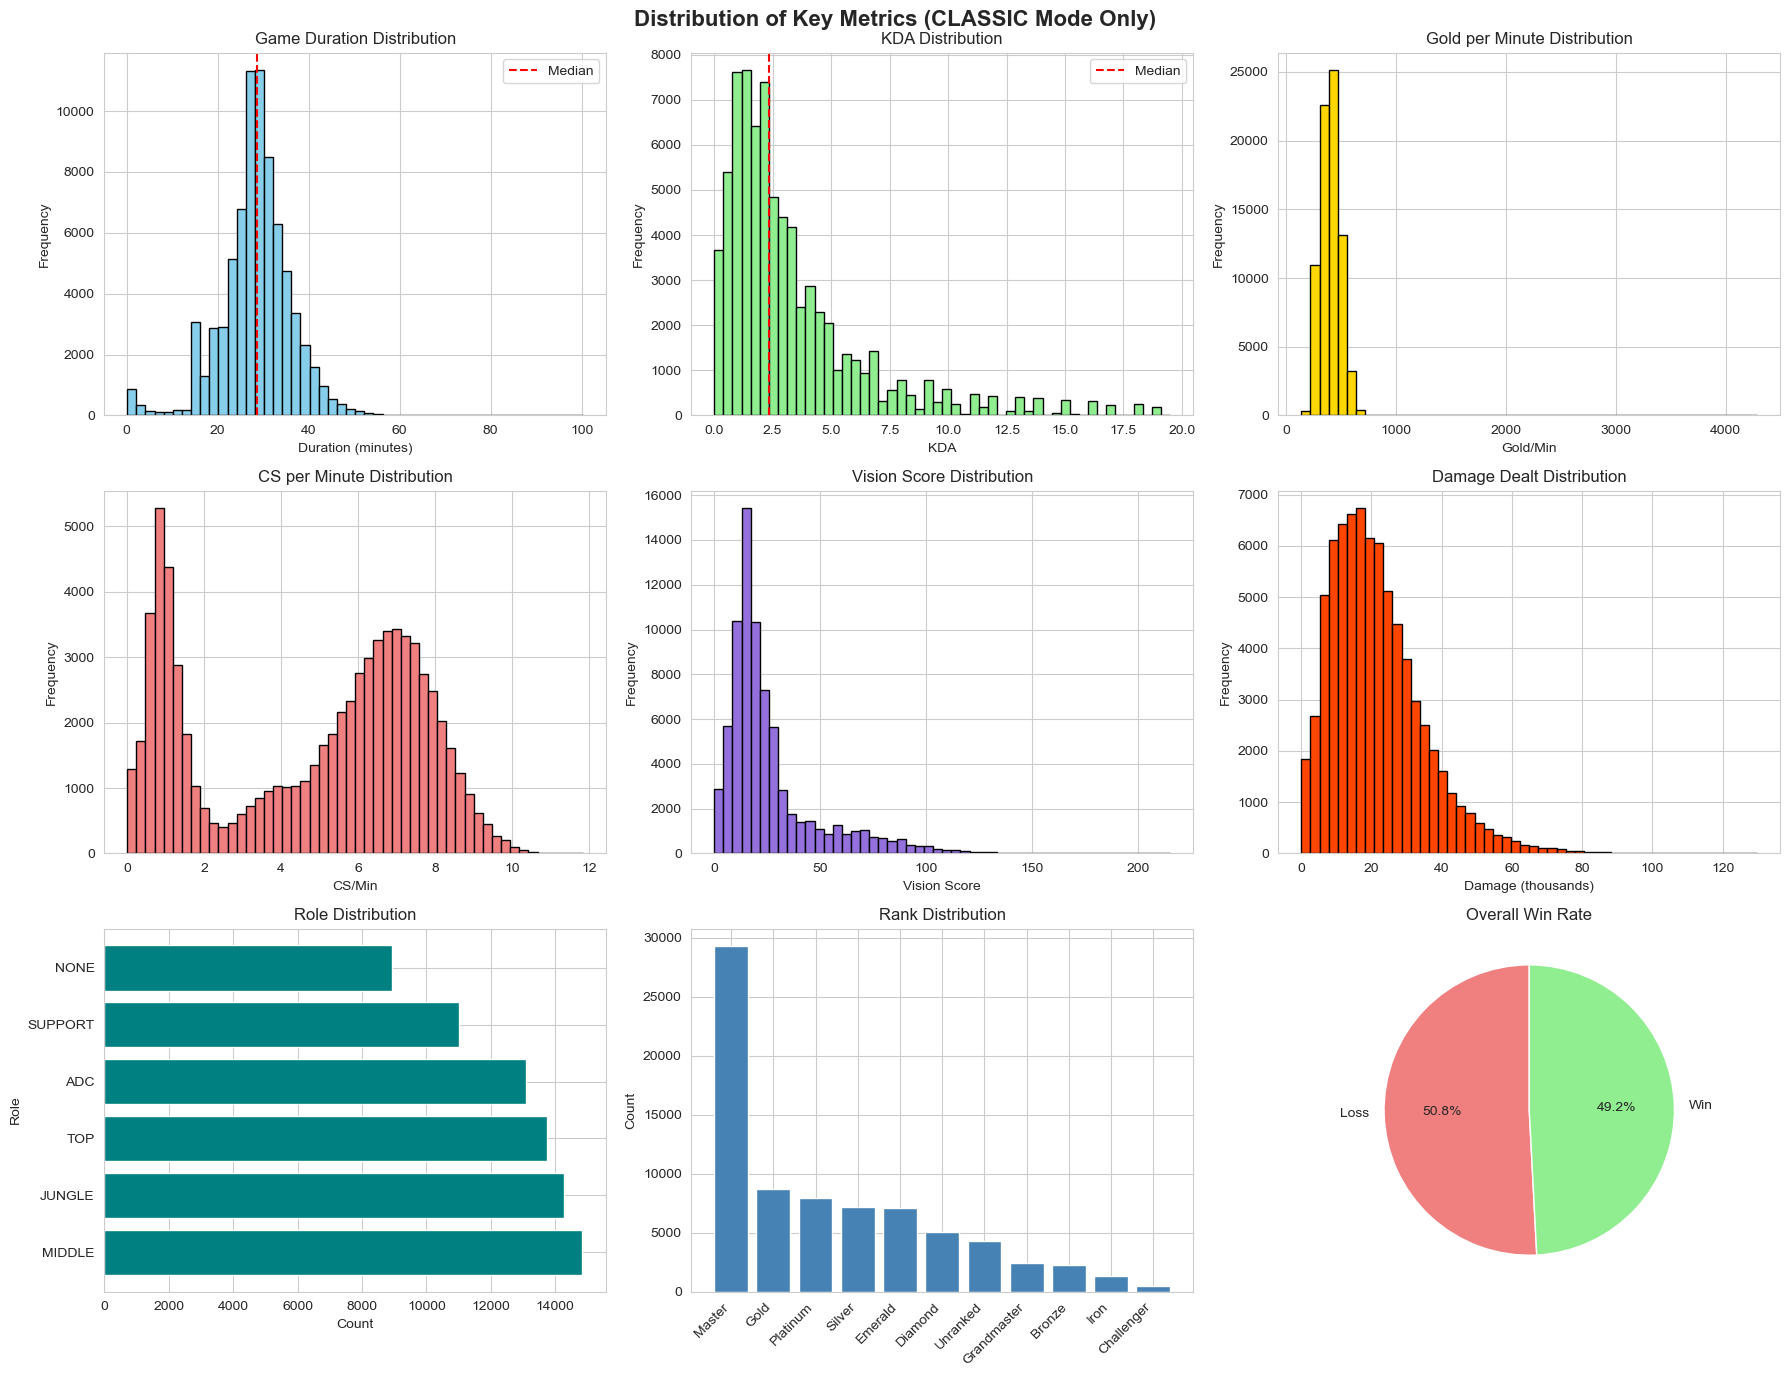

In [28]:
# Create a comprehensive distribution dashboard
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Distribution of Key Metrics (CLASSIC Mode Only)', fontsize=16, fontweight='bold')

# 1. Game Duration
axes[0, 0].hist(match_stats_clean['GameDurationMin'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Game Duration Distribution')
axes[0, 0].set_xlabel('Duration (minutes)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(match_stats_clean['GameDurationMin'].median(), color='red', linestyle='--', label='Median')
axes[0, 0].legend()

# 2. KDA Distribution
kda_filtered = match_stats_clean[match_stats_clean['KDA'] < 20]
axes[0, 1].hist(kda_filtered['KDA'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('KDA Distribution')
axes[0, 1].set_xlabel('KDA')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(match_stats_clean['KDA'].median(), color='red', linestyle='--', label='Median')
axes[0, 1].legend()

# 3. Gold per Minute
axes[0, 2].hist(match_stats_clean['GoldPerMin'], bins=50, color='gold', edgecolor='black')
axes[0, 2].set_title('Gold per Minute Distribution')
axes[0, 2].set_xlabel('Gold/Min')
axes[0, 2].set_ylabel('Frequency')

# 4. CS per Minute
axes[1, 0].hist(match_stats_clean['CSPerMin'], bins=50, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('CS per Minute Distribution')
axes[1, 0].set_xlabel('CS/Min')
axes[1, 0].set_ylabel('Frequency')

# 5. Vision Score
axes[1, 1].hist(match_stats_clean['visionScore'], bins=50, color='mediumpurple', edgecolor='black')
axes[1, 1].set_title('Vision Score Distribution')
axes[1, 1].set_xlabel('Vision Score')
axes[1, 1].set_ylabel('Frequency')

# 6. Damage Dealt
axes[1, 2].hist(match_stats_clean['DmgDealt']/1000, bins=50, color='orangered', edgecolor='black')
axes[1, 2].set_title('Damage Dealt Distribution')
axes[1, 2].set_xlabel('Damage (thousands)')
axes[1, 2].set_ylabel('Frequency')

# 7. Role Distribution
role_counts = match_stats_clean['Role'].value_counts()
axes[2, 0].barh(role_counts.index, role_counts.values, color='teal')
axes[2, 0].set_title('Role Distribution')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('Role')

# 8. Rank Distribution
rank_counts = match_stats_clean['RankName'].value_counts()
axes[2, 1].bar(range(len(rank_counts)), rank_counts.values, color='steelblue')
axes[2, 1].set_xticks(range(len(rank_counts)))
axes[2, 1].set_xticklabels(rank_counts.index, rotation=45, ha='right')
axes[2, 1].set_title('Rank Distribution')
axes[2, 1].set_ylabel('Count')

# 9. Win Rate
win_counts = match_stats_clean['Win'].value_counts()
colors_win = ['lightcoral', 'lightgreen']
axes[2, 2].pie(win_counts.values, labels=['Loss', 'Win'], autopct='%1.1f%%', 
               colors=colors_win, startangle=90)
axes[2, 2].set_title('Overall Win Rate')

plt.tight_layout()
plt.show()


### 5.2 Performance by Role


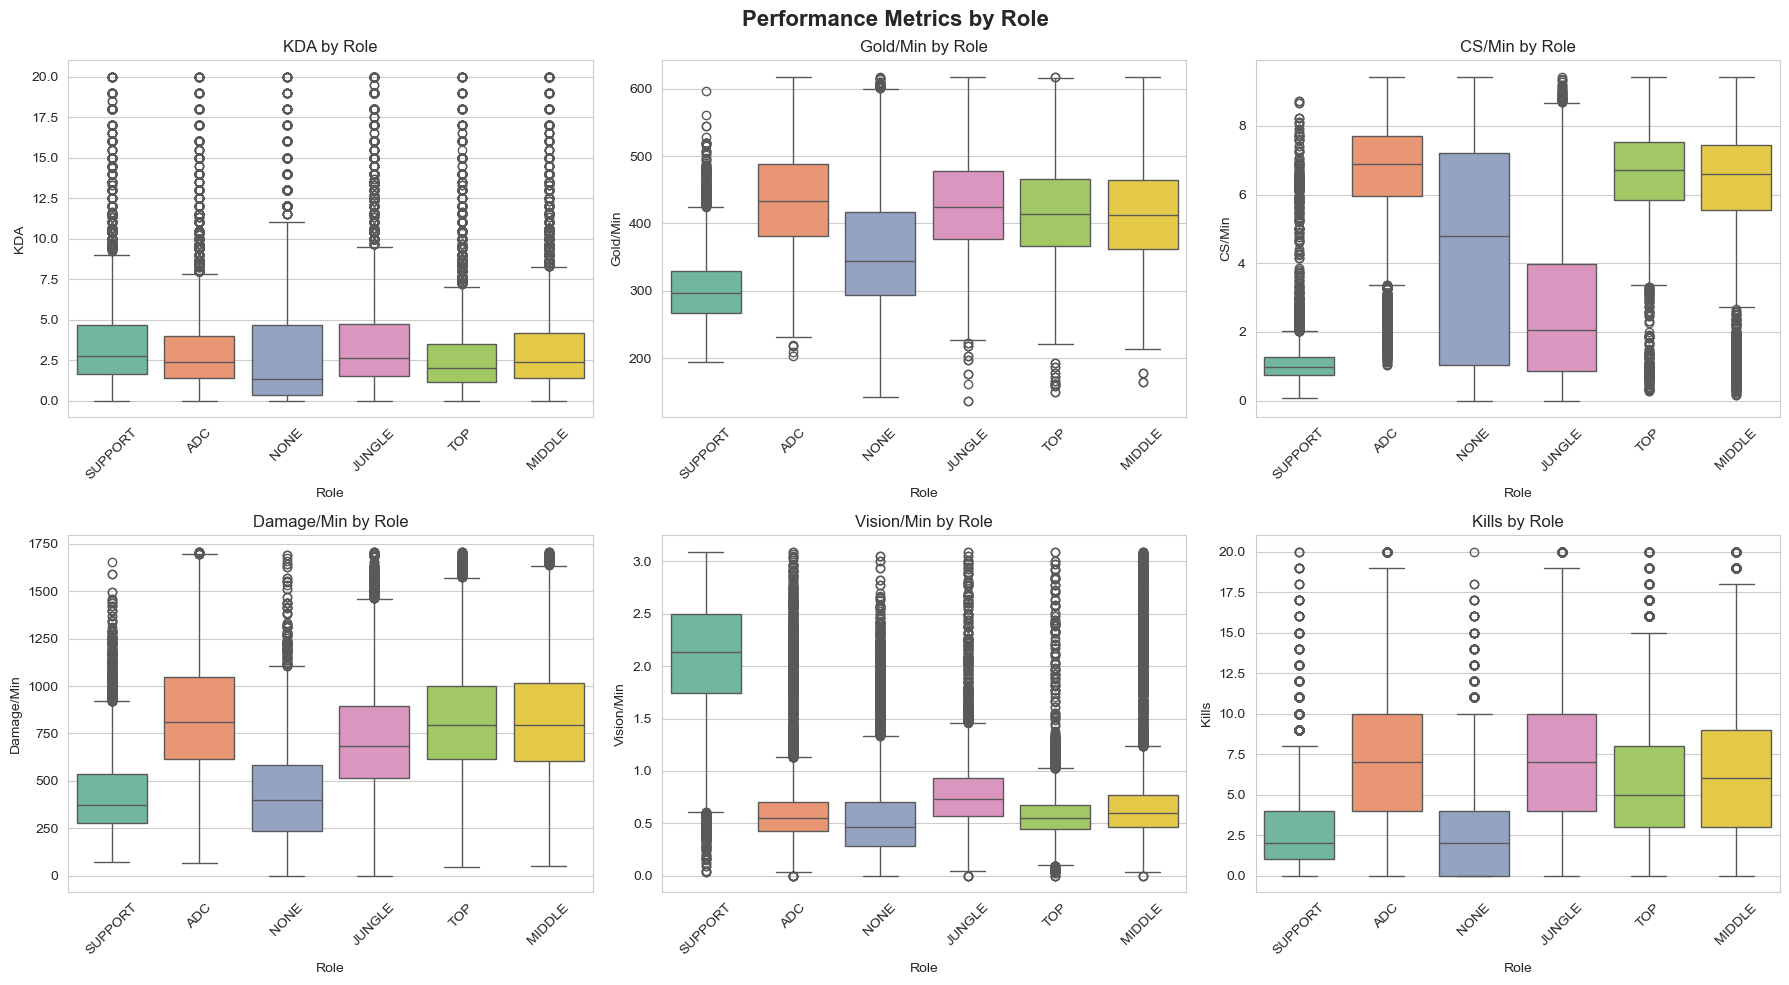


Average Performance by Role:


,KDA,GoldPerMin,CSPerMin,DmgPerMin,VisionPerMin,Win
Role,,,,,,
ADC,3.41,440.46,6.73,869.72,0.63,0.50
JUNGLE,4.19,430.97,2.62,730.14,0.78,0.50
MIDDLE,3.66,416.14,6.25,835.19,0.75,0.51
NONE,3.15,364.11,4.38,424.77,0.57,0.52
SUPPORT,4.24,302.10,1.15,434.05,2.15,0.52
TOP,3.00,420.35,6.65,832.23,0.58,0.51


In [29]:
# Box plots for key metrics by role
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Performance Metrics by Role', fontsize=16, fontweight='bold')

metrics_to_plot = [
    ('KDA', 'KDA'),
    ('GoldPerMin', 'Gold/Min'),
    ('CSPerMin', 'CS/Min'),
    ('DmgPerMin', 'Damage/Min'),
    ('VisionPerMin', 'Vision/Min'),
    ('kills', 'Kills')
]

for idx, (metric, label) in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    
    # Filter extreme outliers for better visualization
    data_filtered = match_stats_clean[match_stats_clean[metric] < match_stats_clean[metric].quantile(0.99)]
    
    sns.boxplot(data=data_filtered, x='Role', y=metric, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{label} by Role')
    axes[row, col].set_xlabel('Role')
    axes[row, col].set_ylabel(label)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics by role
print("\nAverage Performance by Role:")
role_summary = match_stats_clean.groupby('Role').agg({
    'KDA': 'mean',
    'GoldPerMin': 'mean',
    'CSPerMin': 'mean',
    'DmgPerMin': 'mean',
    'VisionPerMin': 'mean',
    'Win': 'mean'
}).round(2)
display(role_summary)


### 5.3 Champion Analysis


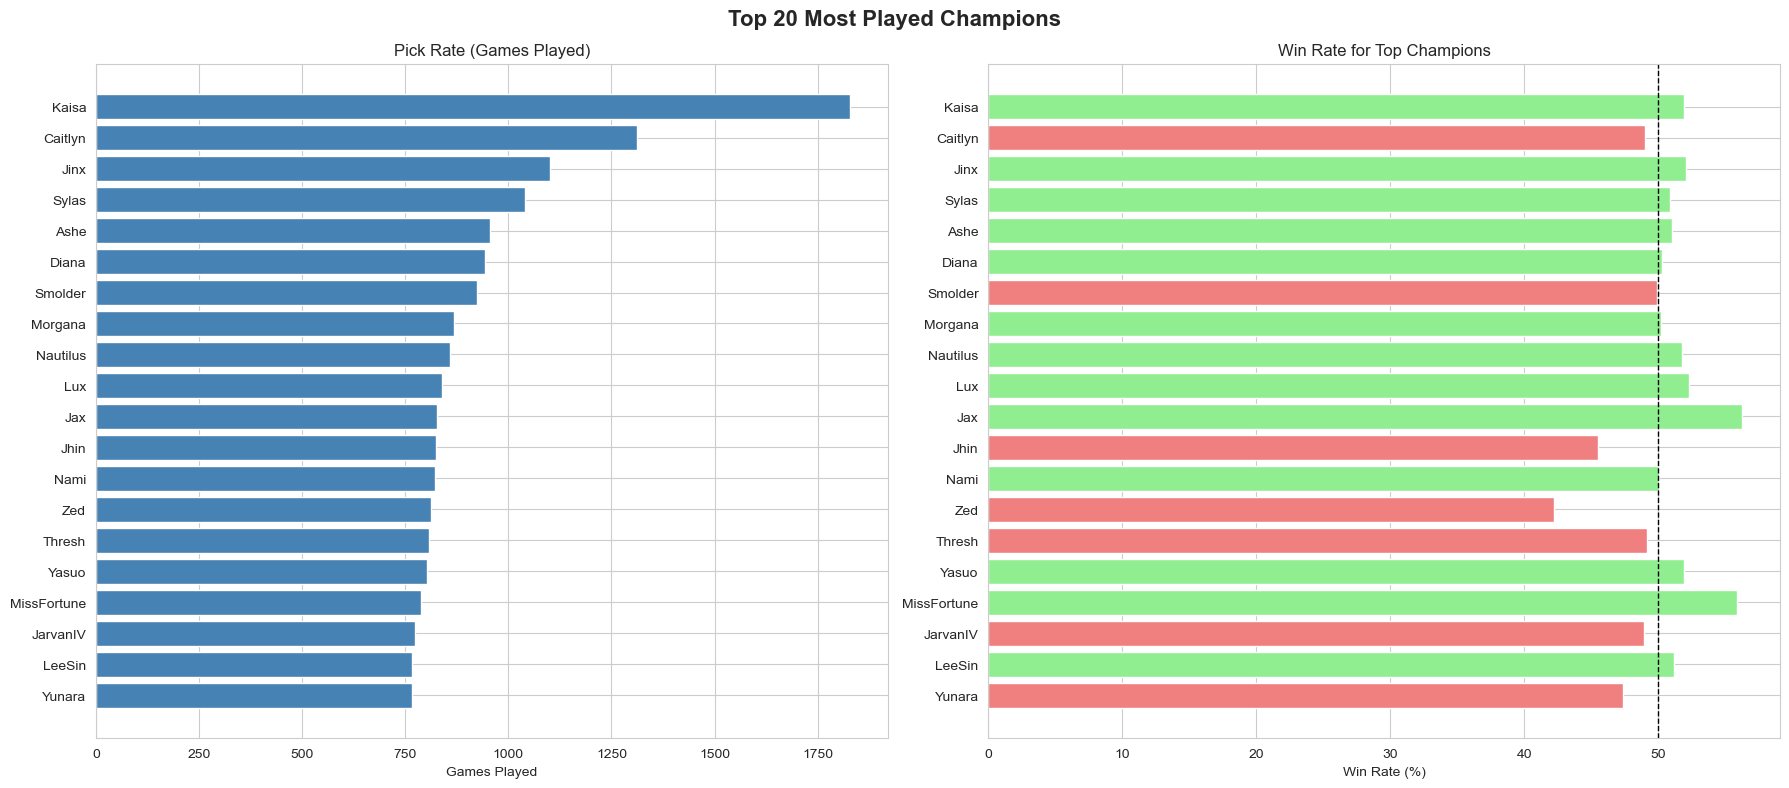


Top 20 Champions Summary:


,GamesPlayed,Win,KDA,GoldPerMin
ChampionName,,,,
Kaisa,1828,0.52,3.68,461.03
Caitlyn,1312,0.49,2.98,436.67
Jinx,1100,0.52,3.44,432.05
Sylas,1041,0.51,3.92,421.45
Ashe,955,0.51,3.31,407.11
Diana,944,0.50,3.49,441.41
Smolder,925,0.50,3.36,440.42
Morgana,869,0.50,4.26,353.61
Nautilus,859,0.52,3.51,294.75


In [30]:
# Champion statistics
champion_stats = match_stats_clean.groupby('ChampionName').agg({
    'MatchStatsId': 'count',
    'Win': 'mean',
    'KDA': 'mean',
    'kills': 'mean',
    'deaths': 'mean',
    'assists': 'mean',
    'GoldPerMin': 'mean',
    'DmgPerMin': 'mean'
}).rename(columns={'MatchStatsId': 'GamesPlayed'})

# Filter champions with at least 50 games for meaningful stats
champion_stats = champion_stats[champion_stats['GamesPlayed'] >= 50]
champion_stats = champion_stats.sort_values('GamesPlayed', ascending=False)

# Top 20 by pick rate
top_20_picks = champion_stats.head(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Top 20 Most Played Champions', fontsize=16, fontweight='bold')

# Pick rate
axes[0].barh(range(len(top_20_picks)), top_20_picks['GamesPlayed'], color='steelblue')
axes[0].set_yticks(range(len(top_20_picks)))
axes[0].set_yticklabels(top_20_picks.index)
axes[0].set_xlabel('Games Played')
axes[0].set_title('Pick Rate (Games Played)')
axes[0].invert_yaxis()

# Win rate for top picks
colors = ['lightgreen' if wr > 0.5 else 'lightcoral' for wr in top_20_picks['Win']]
axes[1].barh(range(len(top_20_picks)), top_20_picks['Win'] * 100, color=colors)
axes[1].set_yticks(range(len(top_20_picks)))
axes[1].set_yticklabels(top_20_picks.index)
axes[1].set_xlabel('Win Rate (%)')
axes[1].set_title('Win Rate for Top Champions')
axes[1].axvline(50, color='black', linestyle='--', linewidth=1)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 20 Champions Summary:")
display(top_20_picks[['GamesPlayed', 'Win', 'KDA', 'GoldPerMin']].round(2))


### 5.4 Win Rate vs Pick Rate Interactive Scatter


In [31]:
# Interactive scatter plot with Plotly
fig = px.scatter(
    champion_stats.reset_index(),
    x='GamesPlayed',
    y='Win',
    hover_name='ChampionName',
    size='KDA',
    color='Win',
    color_continuous_scale='RdYlGn',
    labels={'GamesPlayed': 'Games Played (Pick Rate)', 
            'Win': 'Win Rate',
            'KDA': 'Avg KDA'},
    title='Champion Win Rate vs Pick Rate (Bubble Size = KDA)',
    height=600
)

fig.add_hline(y=0.5, line_dash="dash", line_color="gray", 
              annotation_text="50% Win Rate", annotation_position="right")

fig.update_layout(
    xaxis_title="Games Played",
    yaxis_title="Win Rate",
    yaxis_tickformat=".0%"
)

fig.show()

# Identify high win rate + high pick rate champions (meta champions)
meta_champs = champion_stats[(champion_stats['Win'] > 0.52) & (champion_stats['GamesPlayed'] > 200)].sort_values('Win', ascending=False)
print("\n🔥 Meta Champions (>52% WR, >200 games):")
display(meta_champs[['GamesPlayed', 'Win', 'KDA']].head(10).round(3))



🔥 Meta Champions (>52% WR, >200 games):


,GamesPlayed,Win,KDA
ChampionName,,,
Kled,238,0.613,3.316
Viktor,267,0.599,3.364
Poppy,379,0.599,4.008
Ivern,263,0.593,6.202
Seraphine,388,0.582,5.057
Fiddlesticks,201,0.582,3.887
Trundle,289,0.581,4.039
Corki,384,0.581,3.763
Tristana,673,0.579,3.389


### 5.5 Correlation Analysis


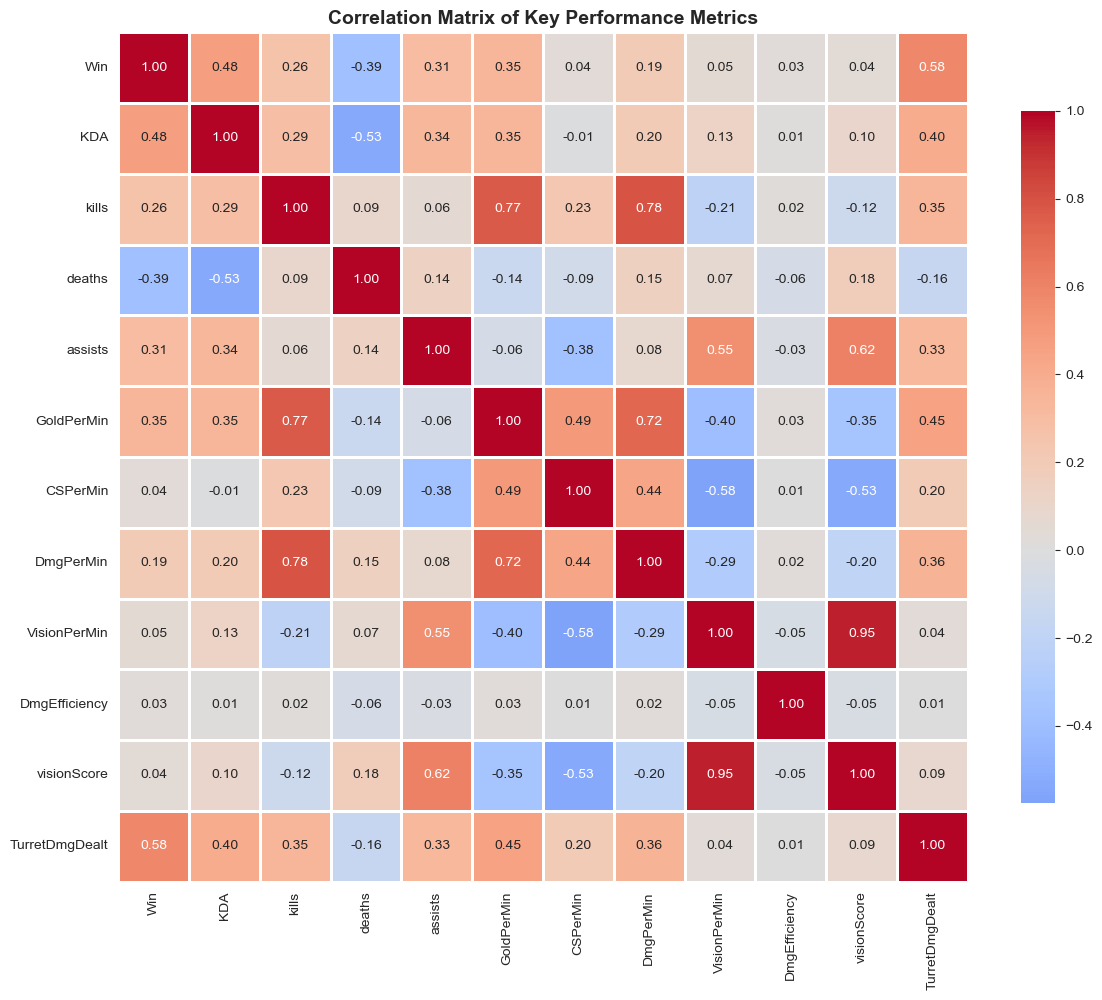


Strongest correlations with Win:
TurretDmgDealt    0.575970
KDA               0.476548
GoldPerMin        0.352800
assists           0.309549
kills             0.259309
DmgPerMin         0.194129
VisionPerMin      0.053277
visionScore       0.043961
CSPerMin          0.039884
DmgEfficiency     0.029091
Name: Win, dtype: float64


In [32]:
# Correlation matrix for key metrics
correlation_metrics = [
    'Win', 'KDA', 'kills', 'deaths', 'assists', 
    'GoldPerMin', 'CSPerMin', 'DmgPerMin', 'VisionPerMin',
    'DmgEfficiency', 'visionScore', 'TurretDmgDealt'
]

corr_matrix = match_stats_clean[correlation_metrics].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Performance Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strongest correlations with Win
win_correlations = corr_matrix['Win'].sort_values(ascending=False)
print("\nStrongest correlations with Win:")
print(win_correlations[1:].head(10))


## 6. Export Clean Dataset


In [33]:
# Export cleaned dataset
output_file = 'league_match_stats_cleaned.csv'
match_stats_clean.to_csv(output_file, index=False)

print(f"✅ Clean dataset exported to: {output_file}")
print(f"   Shape: {match_stats_clean.shape}")
print(f"   Rows: {len(match_stats_clean):,}")
print(f"   Columns: {len(match_stats_clean.columns)}")

# Also export champion summary
summary_output = 'league_champion_summary.csv'
champion_stats.to_csv(summary_output)
print(f"\n✅ Champion summary exported to: {summary_output}")
print(f"   Champions analyzed: {len(champion_stats)}")


✅ Clean dataset exported to: league_match_stats_cleaned.csv
   Shape: (75897, 56)
   Rows: 75,897
   Columns: 56

✅ Champion summary exported to: league_champion_summary.csv
   Champions analyzed: 171


## 7. Summary and Key Insights


In [34]:
print("=" * 80)
print("DATA CLEANING & ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n📊 Dataset Overview (CLASSIC Mode Only):")
print(f"   • Total matches: {matches_df['MatchId'].nunique():,}")
print(f"   • Total player records: {len(match_stats_clean):,}")
print(f"   • Unique summoners: {summoner_matches_df['SummonerFk'].nunique():,}")
print(f"   • Unique champions: {match_stats_clean['ChampionFk'].nunique()}")
print(f"   • Game mode: CLASSIC (Summoner's Rift) only")
print(f"   • Patch range: {match_stats_clean['Patch'].min()} to {match_stats_clean['Patch'].max()}")

print(f"\n🧹 Data Cleaning Completed:")
print(f"   ✓ Filtered to CLASSIC game mode only (removed ARAM)")
print(f"   ✓ Separated ADC from Support (BOTTOM lane)")
print(f"   ✓ Cleaned {len(items_df)} item names (removed HTML tags)")
print(f"   ✓ Removed invalid champion records")
print(f"   ✓ Handled missing/infinite values")

print(f"\n🔧 Features Engineered:")
print(f"   ✓ KDA ratio")
print(f"   ✓ Per-minute metrics (Gold, CS, Damage, Vision)")
print(f"   ✓ Efficiency metrics (Damage per Gold, Damage Efficiency)")
print(f"   ✓ Game phase classification (Early/Mid/Late)")
print(f"   ✓ Item count")
print(f"   ✓ Objective participation")

print(f"\n📈 Key Insights:")
print(f"   • Overall win rate: {match_stats_clean['Win'].mean()*100:.1f}%")
print(f"   • Average game duration: {match_stats_clean['GameDurationMin'].mean():.1f} minutes")
print(f"   • Average KDA: {match_stats_clean['KDA'].mean():.2f}")
print(f"   • Average CS/min: {match_stats_clean['CSPerMin'].mean():.2f}")
print(f"   • Average vision score: {match_stats_clean['visionScore'].mean():.1f}")
print(f"   • Most played champion: {champion_stats.index[0]} ({champion_stats.iloc[0]['GamesPlayed']:.0f} games)")

print(f"\n🎯 Recommended Next Steps:")
print(f"   1. Build match outcome prediction model (ML)")
print(f"   2. Analyze champion synergies and counter-picks")
print(f"   3. Identify meta shifts across patches")
print(f"   4. Study optimal item build paths by champion")
print(f"   5. Analyze scaling patterns (early vs late game)")
print(f"   6. Deep dive into role-specific carry potential")

print("\n" + "=" * 80)
print("✅ ANALYSIS COMPLETE - Ready for Machine Learning!")
print("=" * 80)


DATA CLEANING & ANALYSIS SUMMARY

📊 Dataset Overview (CLASSIC Mode Only):
   • Total matches: 33,696
   • Total player records: 75,897
   • Unique summoners: 2,535
   • Unique champions: 171
   • Game mode: CLASSIC (Summoner's Rift) only
   • Patch range: 13.22.541.9804 to 15.9.678.398

🧹 Data Cleaning Completed:
   ✓ Filtered to CLASSIC game mode only (removed ARAM)
   ✓ Separated ADC from Support (BOTTOM lane)
   ✓ Cleaned 635 item names (removed HTML tags)
   ✓ Removed invalid champion records
   ✓ Handled missing/infinite values

🔧 Features Engineered:
   ✓ KDA ratio
   ✓ Per-minute metrics (Gold, CS, Damage, Vision)
   ✓ Efficiency metrics (Damage per Gold, Damage Efficiency)
   ✓ Game phase classification (Early/Mid/Late)
   ✓ Item count
   ✓ Objective participation

📈 Key Insights:
   • Overall win rate: 50.8%
   • Average game duration: 28.4 minutes
   • Average KDA: 3.62
   • Average CS/min: 4.76
   • Average vision score: 26.2
   • Most played champion: Kaisa (1828 games)

🎯 